In [ ]:
# pip install statsmodels

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from statsmodels.stats.weightstats import ztest

# Data Loading & Initial Exploration
- Load the dataset (CSV) into a Pandas DataFrame.


- Display the first few rows, data types, and summary statistics using .describe() and .dtypes.


- Check and handle any missing values (if present).


In [64]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [65]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [66]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [67]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [68]:
df.isnull().sum()  # no missing value 

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Descriptive Analysis (NumPy, Pandas, Seaborn)
- Compute average values for BMI, Hypertension, Glucose, and HbA1c.


- Compute and interpret the correlation matrix among these health indicators.


- Group the data by Diabetes Status and compare the mean values of these variables.


- Visualizations using Seaborn:
- Histogram of BMI distributions.
- Boxplot of Glucose levels grouped by Diabetes Status.
- Scatter plot with regression line: HbA1c vs Blood Glucose (sns.regplot).
- Heatmap showing the correlation matrix.


In [69]:
# Compute average values for BMI, Hypertension, Glucose, and HbA1c.
avg_bmi = df['bmi'].mean()
avg_hypertension = df['hypertension'].mean()
avg_glucose = df['blood_glucose_level'].mean()
avg_hba1c = df['HbA1c_level'].mean()
print("avg_bmi =",avg_bmi)
print("avg_hypertension =",avg_hypertension)
print("avg_glucose =",avg_glucose)
print("avg_hba1c =",avg_hba1c)

avg_bmi = 27.3207671
avg_hypertension = 0.07485
avg_glucose = 138.05806
avg_hba1c = 5.527507


In [70]:
#Compute and interpret the correlation matrix among these health indicators.
health_indicators = ['bmi', 'hypertension', 'blood_glucose_level', 'HbA1c_level', 'age', 'heart_disease']
correlation_matrix = df[health_indicators].corr()
print(correlation_matrix)

                          bmi  hypertension  blood_glucose_level  HbA1c_level  \
bmi                  1.000000      0.147666             0.091261     0.082997   
hypertension         0.147666      1.000000             0.084429     0.080939   
blood_glucose_level  0.091261      0.084429             1.000000     0.166733   
HbA1c_level          0.082997      0.080939             0.166733     1.000000   
age                  0.337396      0.251171             0.110672     0.101354   
heart_disease        0.061198      0.121262             0.070066     0.067589   

                          age  heart_disease  
bmi                  0.337396       0.061198  
hypertension         0.251171       0.121262  
blood_glucose_level  0.110672       0.070066  
HbA1c_level          0.101354       0.067589  
age                  1.000000       0.233354  
heart_disease        0.233354       1.000000  


In [71]:
#Group the data by Diabetes Status and compare the mean values of these variables
grouped_by_diabetes = df.groupby('diabetes')[health_indicators].mean()
print(grouped_by_diabetes)

                bmi  hypertension  blood_glucose_level  HbA1c_level  \
diabetes                                                              
0         26.887163      0.058984           132.852470     5.396761   
1         31.988382      0.245647           194.094706     6.934953   

                age  heart_disease  
diabetes                            
0         40.115187       0.029235  
1         60.946588       0.149059  


# Visualizations using Seaborn:


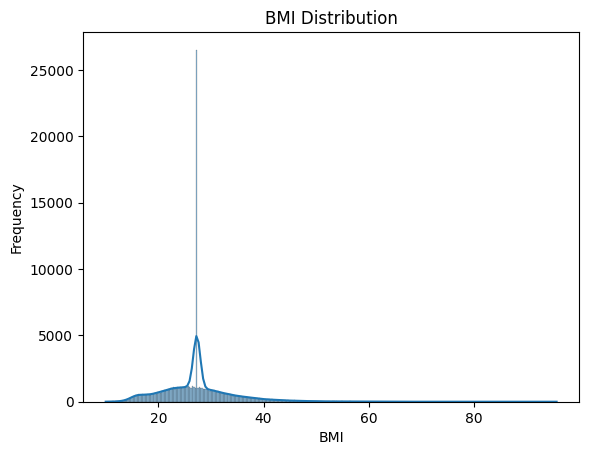

In [72]:
#Histogram of BMI distributions.
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

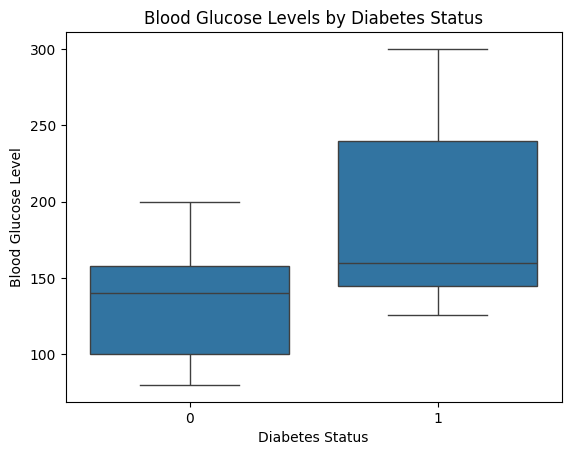

In [73]:
# Boxplot of Glucose levels grouped by Diabetes Status
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.show()

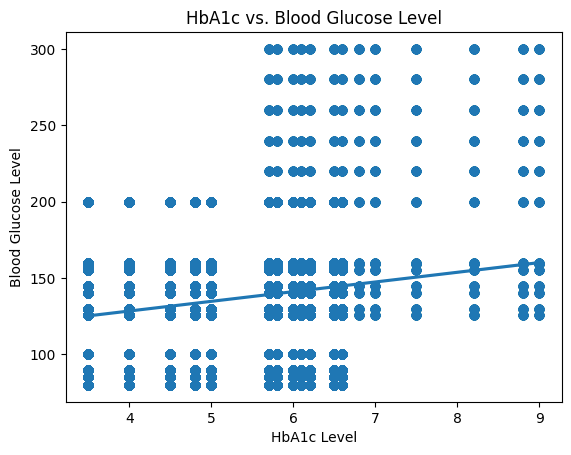

In [74]:
#Scatter plot with regression line: HbA1c vs Blood Glucose (sns.regplot).
sns.regplot(x='HbA1c_level', y='blood_glucose_level', data=df)
plt.title('HbA1c vs. Blood Glucose Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.show()

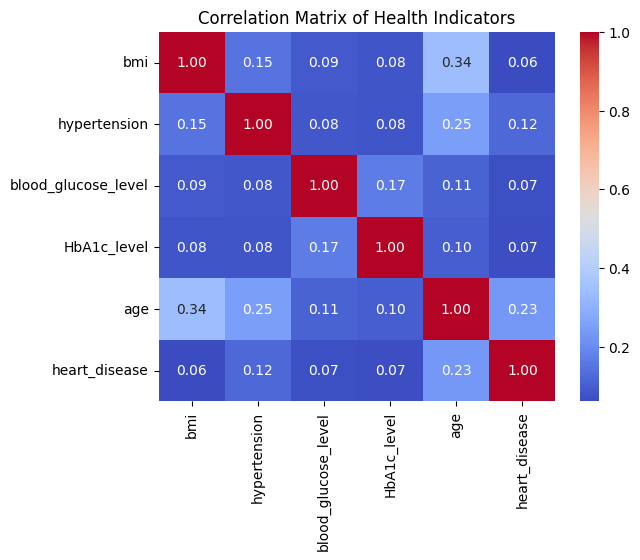

In [75]:
#Heatmap showing the correlation matrix.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Health Indicators')
plt.show()

# Hypothesis Testing
- Z-Test


     - Claim: The average BMI in this population = 25.

     - Conduct a one-sample Z-test to assess if the sample diverges significantly from this claim.


- T-Test


     - Question: Is the average age different between diabetic-positive and diabetic-negative groups?

     - Use an independent two-sample t-test and interpret the result.


- Chi-Square Test


    - Question: Is Smoking History related to Diabetes Status?

   - Create a contingency table and perform a Chi-Square test of independence.

In [76]:
#Z-Test
#Claim: The average BMI in this population = 25.
#Conduct a one-sample Z-test to assess if the sample diverges significantly from this claim.
claimed_bmi = 25
z_statistic, p_value_z = ztest(df['bmi'], value=claimed_bmi)
print(f"Z-Test for BMI:")
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value_z}")
if p_value_z < 0.05:
    print("The sample mean BMI is significantly different from 25.")
else:
    print("The sample mean BMI is not significantly different from 25.")


Z-Test for BMI:
Z-statistic: 110.57931974055543
P-value: 0.0
The sample mean BMI is significantly different from 25.


In [77]:
#T-Test
#Question: Is the average age different between diabetic-positive and diabetic-negative groups?
#Use an independent two-sample t-test and interpret the result.
diabetic_positive = df[df['diabetes'] == 1]['age']
diabetic_negative = df[df['diabetes'] == 0]['age']
t_statistic, p_value_t = ttest_ind(diabetic_positive, diabetic_negative)
print(f"\nT-Test for Age between Diabetic-Positive and Diabetic-Negative groups:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value_t}")
if p_value_t < 0.05:
    print("There is a significant difference in age between diabetic and non-diabetic groups.")
else:
    print("There is no significant difference in age between diabetic and non-diabetic groups.")



T-Test for Age between Diabetic-Positive and Diabetic-Negative groups:
T-statistic: 84.44765154890852
P-value: 0.0
There is a significant difference in age between diabetic and non-diabetic groups.


In [78]:
#Chi-Square Test
#Question: Is Smoking History related to Diabetes Status?
#Create a contingency table and perform a Chi-Square test of independence.
contingency_table = pd.crosstab(df['smoking_history'], df['diabetes'])
chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print(f"\nChi-Square Test for Smoking History and Diabetes Status:")
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p_value_chi2}")
if p_value_chi2 < 0.05:
    print("There is a significant association between smoking history and diabetes status.")
else:
    print("There is no significant association between smoking history and diabetes status.")


Chi-Square Test for Smoking History and Diabetes Status:
Contingency Table:
diabetes             0     1
smoking_history             
No Info          34362  1454
current           8338   948
ever              3532   472
former            7762  1590
never            31749  3346
not current       5757   690

Chi-square statistic: 1956.0944200848764
P-value: 0.0
There is a significant association between smoking history and diabetes status.


#  Summary & Insights
- Write 5–7 bullet points summarizing your findings:
- Which indicators differ most between diabetic and non-diabetic groups?
- What were the results of the Z-test, T-test, and Chi-Square test?
- What insights might healthcare professionals draw from your analysis?


# Summary of Findings
- Key Differentiating Indicators: Blood glucose level, HbA1c level, age, BMI, and hypertension are the most significant indicators that differ between diabetic and non-diabetic individuals.

- Z-Test Result: The average BMI in the dataset is significantly different from the claimed average of 25, indicating a generally higher BMI in this population.

- T-Test Result: There is a substantial and statistically significant age difference between individuals with and without diabetes, with older individuals being more prone to diabetes.

- Chi-Square Test Result: A person's smoking history is significantly associated with their likelihood of having diabetes.

- Clinical Insights: The analysis highlights that individuals with diabetes tend to be older, have a higher BMI, and are more likely to have a history of hypertension. The strong correlation between HbA1c and blood glucose levels underscores the importance of both metrics in diabetes management.

- Preventive Measures: The findings suggest that healthcare professionals should focus on lifestyle interventions, such as weight management (BMI control) and smoking cessation, particularly in older populations, to mitigate the risk of diabetes.

- Screening: Given the clear distinctions in health indicators, routine screenings for blood glucose, HbA1c, and blood pressure, especially for older and overweight individuals, are crucial for early detection and management of diabetes.